### Importing the required libraries and packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
sales_data = pd.read_csv('Champagne Sales.csv')
sales_data['Month'] = pd.to_datetime(sales_data['Month'])

#Here are we are setting the index of the dataframe to the variable
sales_data.set_index('Month', inplace = True)
sales_data

,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


### Plotting the series

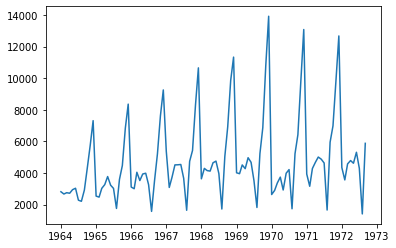

In [3]:
plt.plot(sales_data)
plt.show()

**Here we can observe that there is a seasonality associated with data as every year there is a spike in increasing sales**

### Decomposing Time Series Function

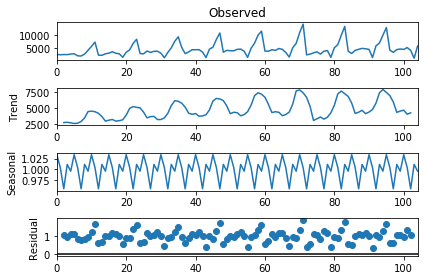

In [5]:
ts_decompose = seasonal_decompose(np.array(sales_data['Champagne sales']),
                                 model='mul',
                                 period = 5)

#plotting the decomposed time series components
ts_plot = ts_decompose.plot()

In [6]:
sales_data['Seasonal'] = ts_decompose.seasonal
sales_data['trend'] = ts_decompose.trend

In [7]:
sales_data

,Champagne sales,Seasonal,trend
Month,,,
1964-01-01,2815,1.034254,NaN
1964-02-01,2672,1.004101,NaN
1964-03-01,2755,0.954407,2781.8
1964-04-01,2721,1.011561,2826.0
1964-05-01,2946,0.995678,2748.0
...,...,...,...
1972-05-01,4618,1.034254,4718.6
1972-06-01,5312,1.004101,4085.8
1972-07-01,4298,0.954407,4303.6


### For additive model

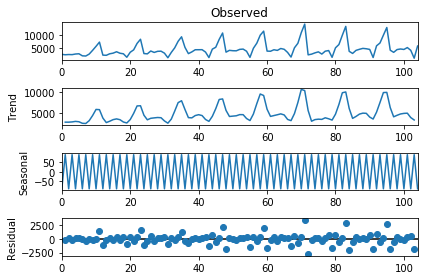

In [12]:
ts_decompose1 = seasonal_decompose(np.array(sales_data['Champagne sales']),
                                 model='add',
                                 period = 2)

#plotting the decomposed time series components
ts_plot1 = ts_decompose1.plot()

In [13]:
sales_data['Seasonal'] = ts_decompose1.seasonal
sales_data['trend'] = ts_decompose1.trend

In [14]:
sales_data

,Champagne sales,Seasonal,trend
Month,,,
1964-01-01,2815,-90.260275,NaN
1964-02-01,2672,90.260275,2728.50
1964-03-01,2755,-90.260275,2725.75
1964-04-01,2721,90.260275,2785.75
1964-05-01,2946,-90.260275,2912.25
...,...,...,...
1972-05-01,4618,-90.260275,4834.00
1972-06-01,5312,90.260275,4885.00
1972-07-01,4298,-90.260275,3830.25
